In [1]:
import requests

### teamber data:

In [23]:
url = 'https://teamber.api.wandeed.com/api/lst/search?offset=0&limit=500'
access_token = 'Bearer eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJLQ01VZlkwNDZJSF9vOFo2SmUzaUF2cTRXc21yQkFrdGRTU18wZjNzMmlzIn0.eyJleHAiOjE2Njc4NjAyNzQsImlhdCI6MTY2Nzg0MjI3NCwiYXV0aF90aW1lIjoxNjY3ODQyMTg0LCJqdGkiOiJiNGZlOGU2Ny1iZDU4LTQxMGItOTE0YS1lMmFjODJhNmQxY2IiLCJpc3MiOiJodHRwczovL3RlYW1iZXIuYXV0aC53YW5kZWVkLmNvbS9hdXRoL3JlYWxtcy93YW5kZWVkLXJlYWxtIiwiYXVkIjoiYWNjb3VudCIsInN1YiI6IjVkNDc5Y2QxLTgyZTUtNGI3Ni04ZGZjLTE0Y2Q4N2ZlOWIzMyIsInR5cCI6IkJlYXJlciIsImF6cCI6IndhbmRlZWQtY2xpZW50Iiwibm9uY2UiOiI4MDMxYWM5NC05Y2IzLTQxMTctOTk5Zi03NjA1ZGRhNTc3NjYiLCJzZXNzaW9uX3N0YXRlIjoiYzRiYzUzNTUtY2ExNy00MzIzLWI5OWMtMzliZDkyODIxN2Q0IiwiYWNyIjoiMCIsImFsbG93ZWQtb3JpZ2lucyI6WyJodHRwczovLyoud2FuZGVlZC5jb20vKiIsImh0dHBzOi8vKi5hcGkud2FuZGVlZC5jb20vKiIsIioiLCJodHRwczovLyouYWRtaW4ud2FuZGVlZC5jb20vKiIsImh0dHBzOi8vKi5hdXRoLndhbmRlZWQuY29tIl0sInJlYWxtX2FjY2VzcyI6eyJyb2xlcyI6WyJkZWZhdWx0LXJvbGVzLXdhbmRlZWQtcmVhbG0iLCJvZmZsaW5lX2FjY2VzcyIsInVtYV9hdXRob3JpemF0aW9uIl19LCJyZXNvdXJjZV9hY2Nlc3MiOnsiYWNjb3VudCI6eyJyb2xlcyI6WyJtYW5hZ2UtYWNjb3VudCIsIm1hbmFnZS1hY2NvdW50LWxpbmtzIiwidmlldy1wcm9maWxlIl19fSwic2NvcGUiOiJvcGVuaWQgZW1haWwgcHJvZmlsZSIsInNpZCI6ImM0YmM1MzU1LWNhMTctNDMyMy1iOTljLTM5YmQ5MjgyMTdkNCIsInV0bF9zcGt1dGlsaXNhdGV1ciI6Mjk2LCJ1dGxfY3ByZW5vbSI6IkdheWxvcmQiLCJlbWFpbF92ZXJpZmllZCI6dHJ1ZSwidXRsX3V0aWxpc2F0ZXVyX3JvbGVzIjoiWzFdIiwidXRsX3NhcHBhcnRlbmFuY2UiOlsxMjJdLCJ1dGxfY25vbSI6IlBFVElUIiwicHJlZmVycmVkX3VzZXJuYW1lIjoiZ2F5bG9yZC5wZXRpdEB0ZWFtYmVyLmZyIiwiZ2l2ZW5fbmFtZSI6IkdheWxvcmQiLCJ1dGxfc2ZraW5zdGFuY2UiOjEsInV0bF9zYWRtaW5pc3RyZXIiOltdLCJuYW1lIjoiR2F5bG9yZCBQRVRJVCIsInV0bF9zZHJvaXRzYWNjZXMiOlsxMjAsMTIzLDEyNSwxMjYsMTI3LDIyMl0sImZhbWlseV9uYW1lIjoiUEVUSVQiLCJlbWFpbCI6ImdheWxvcmQucGV0aXRAdGVhbWJlci5mciIsInVzZXJfZ3JvdXBzIjpbMTIyLDEyMCwxMjMsMTI1LDEyNiwxMjcsMjIyXX0.ZO982QRIi4gC-3ozZyc3Rs7VjPO2LhZJxNCzuFyDoov7x2Ua3CKJme3DZO9jSjPhgr9PerXDIz4Snpz_vQoh7bx-DtOUqMVZsKnfuHuzIWtC5KZSxkOFCOYBBRLSMrlFBoj5V7qJAf6tQEsfmta2BUrD0KficQNYgnWs-PCaW1b-dl3GBEs3eQ-KsjcvA3g4AvtCUP6uc2kPDEp_nynBCnYavTefwT8oPGXw74EMupd-OQvQKQGci_AKgtcqidmQ2pJ8X2RZ21TGa3EGejyUz8WfFk-Ug7waEciep_vS2gtdg5P-TUtCge0DJdiKZSru1Qs0UobEqE5pjwm30UebWw'
headers={'Authorization': f'{access_token}',
             'Content-Type':'application/json'}


### development data:

In [24]:
url = 'https://development.api.wandeed.com/api/lst/search?offset=0&limit=500'
access_token = 'Bearer eyJhbGciOiJSUzI1NiIsInR5cCIgOiAiSldUIiwia2lkIiA6ICJydXRUeHJ5dlltOUVZcGhpRjRxak45ajFvTktLNnU4YUhuM1QySFFSUU5FIn0.eyJleHAiOjE2Njc4NjE5MTcsImlhdCI6MTY2Nzg0MzkxNywiYXV0aF90aW1lIjoxNjY3ODIxMjU4LCJqdGkiOiI0NmI3Y2I2MC1lZmM1LTQ5YzAtYTg0ZS1hYmQ5NmU2YTFmNjAiLCJpc3MiOiJodHRwczovL2RldmVsb3BtZW50LmF1dGgud2FuZGVlZC5jb20vYXV0aC9yZWFsbXMvd2FuZGVlZC1yZWFsbSIsImF1ZCI6ImFjY291bnQiLCJzdWIiOiIzMWZmODY3NC1iOGZhLTQyMmYtYWM3NC02YzFjZGI2YTUwZGUiLCJ0eXAiOiJCZWFyZXIiLCJhenAiOiJ3YW5kZWVkLWNsaWVudCIsIm5vbmNlIjoiMzI5MzQ3OTktNmVlNC00ZDBkLThmZDItMzI3NjhhOTczMDk4Iiwic2Vzc2lvbl9zdGF0ZSI6ImQxYTI2YzhlLTZjMDMtNDg3Ni1hZTg5LTc4NDEzN2Y3OGMzNCIsImFjciI6IjAiLCJhbGxvd2VkLW9yaWdpbnMiOlsiaHR0cHM6Ly8qLndhbmRlZWQuY29tLyoiLCJodHRwczovLyouYXBpLndhbmRlZWQuY29tLyoiLCIqIiwiaHR0cHM6Ly8qLmFkbWluLndhbmRlZWQuY29tLyoiLCJodHRwczovLyouYXV0aC53YW5kZWVkLmNvbSJdLCJyZWFsbV9hY2Nlc3MiOnsicm9sZXMiOlsiZGVmYXVsdC1yb2xlcy13YW5kZWVkLXJlYWxtIiwib2ZmbGluZV9hY2Nlc3MiLCJ1bWFfYXV0aG9yaXphdGlvbiJdfSwicmVzb3VyY2VfYWNjZXNzIjp7ImFjY291bnQiOnsicm9sZXMiOlsibWFuYWdlLWFjY291bnQiLCJtYW5hZ2UtYWNjb3VudC1saW5rcyIsInZpZXctcHJvZmlsZSJdfX0sInNjb3BlIjoib3BlbmlkIGVtYWlsIHByb2ZpbGUiLCJzaWQiOiJkMWEyNmM4ZS02YzAzLTQ4NzYtYWU4OS03ODQxMzdmNzhjMzQiLCJ1dGxfc3BrdXRpbGlzYXRldXIiOjEsInV0bF91dGlsaXNhdGV1cl9yb2xlcyI6IlsxXSIsInV0bF9jcHJlbm9tIjoiR2F5bG9yZCIsImVtYWlsX3ZlcmlmaWVkIjp0cnVlLCJ1dGxfc2FwcGFydGVuYW5jZSI6WzIsMzhdLCJ1dGxfY25vbSI6IlBldGl0IiwicHJlZmVycmVkX3VzZXJuYW1lIjoiZ2F5bG9yZC5wZXRpdEB0ZWFtYmVyLmZyIiwibG9jYWxlIjoiZnIiLCJnaXZlbl9uYW1lIjoiR2F5bG9yZCIsInV0bF9zZmtpbnN0YW5jZSI6MSwidXRsX3NhZG1pbmlzdHJlciI6W10sIm5hbWUiOiJHYXlsb3JkIFBldGl0IiwidXRsX3Nkcm9pdHNhY2NlcyI6WzMsNCw1LDE1LDI1LDI2LDMzLDM0LDM1LDM2LDM3LDQwLDQxLDQ0LDQ1LDQ2LDQ3LDYwLDYzLDY0LDY1LDY2LDY3LDY4LDY5LDcwLDcxLDcyLDczLDc0LDc1LDc2LDc3LDc4XSwiZmFtaWx5X25hbWUiOiJQZXRpdCIsImVtYWlsIjoiZ2F5bG9yZC5wZXRpdEB0ZWFtYmVyLmZyIiwidXNlcl9ncm91cHMiOlsyLDM4LDMsNCw1LDE1LDI1LDI2LDMzLDM0LDM1LDM2LDM3LDQwLDQxLDQ0LDQ1LDQ2LDQ3LDYwLDYzLDY0LDY1LDY2LDY3LDY4LDY5LDcwLDcxLDcyLDczLDc0LDc1LDc2LDc3LDc4XX0.JNyHIpLAyU9P6HrDY2Sywj_NxHq9Sga0bCTIFCDlwcMMBf64N9Mf06XmhQKZg-aK71tZC8zNBnuskY3_cf8ViGAs4poaJXZmL8xj9Mw4zqOQSZXPveDjzlfE1PegMUdbK4ui16miyTz1KcmzZlCznoHBzmhKPHTl55o0Ye4YbyH479xDoLHNErNXjimnRP9Og-XyAoIYo_OLjQFzMAfYCO84iJQr8o6nazU2Uo7O2tqf7yZFJMFLHJg5pvvCkZoiK5V_PqpQNdXUILhjnauhV_BD_nLRPMDmLmpaOV0nvIacjaQ2FdiugLuqbwQNKebBv93cwGvZ3w-uk6u9ESygZg'
headers={'Authorization': f'{access_token}',
             'Content-Type':'application/json'}

## requêtes pour les tâches non planifiées :

In [21]:
datein_isoformat  = "2022-09-01T00:00:00.000Z"
dateout_isoformat = "2022-11-01T00:00:00.000Z"
id_utl = 10

from main import get_data_planning_optimizer

In [25]:
data = get_data_planning_optimizer(access_token, datein_isoformat, dateout_isoformat, id_utl, url=url)

In [104]:
import pandas as pd
def split_data_planning_optimizer(data):
    df_imp = pd.DataFrame(data['imperatifs'])
    df_hor = pd.DataFrame(data['horaires']).reindex(columns=['epu_sfkutilisateur','epl_xdebutperiode','epl_xfinperiode','epl_employe_horaire'])
    df_hor.epl_xdebutperiode = pd.to_datetime(df_hor.epl_xdebutperiode).dt.date
    df_hor.epl_xfinperiode = pd.to_datetime(df_hor.epl_xfinperiode).dt.date
    df_hor = df_hor.sort_values(by=['epu_sfkutilisateur','epl_xdebutperiode']).reset_index(drop=True)
    df_tsk = pd.DataFrame(data['taches'])
    return df_imp, df_hor, df_tsk

df_imp, df_hor, df_tsk = split_data_planning_optimizer(data)

# Notes horaires:
- commencent et se terminent toujours au sein d'une même journée

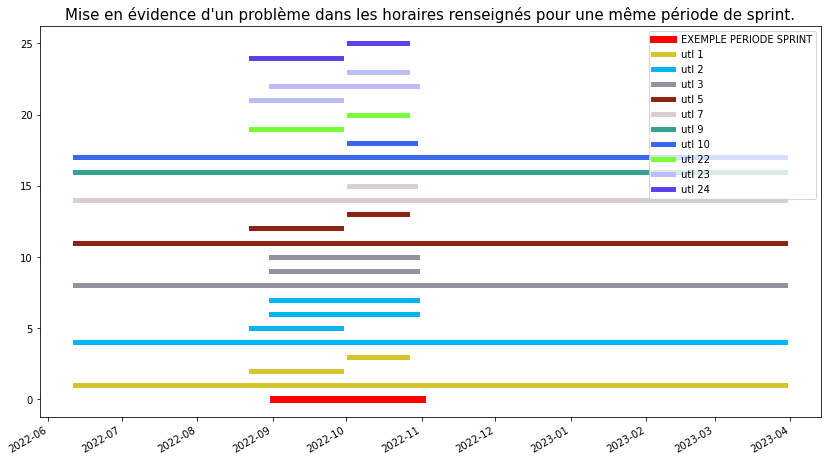

In [116]:
import matplotlib.pyplot as plt
import random


plt.figure(figsize=(14,8))
plt.plot([pd.to_datetime(datein_isoformat).date(), pd.to_datetime(dateout_isoformat).date()],[0,0],c='r',linewidth=7,label='EXEMPLE PERIODE SPRINT')
i = 1


number_of_colors = len(df_hor.epu_sfkutilisateur.unique())
color = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)])
             for i in range(number_of_colors)]
for j, utl in enumerate(df_hor.epu_sfkutilisateur.unique()):
    sub_df = df_hor.loc[df_hor['epu_sfkutilisateur']==utl,]
    for k, row in enumerate(sub_df.iterrows()):
        plt.plot( [row[1].epl_xdebutperiode,row[1]['epl_xfinperiode']],[i,i],c=color[j],linewidth=5,label='utl '+str(utl) if k==0 else None)
        i+=1
        
plt.xticks(rotation = 45);
plt.legend();
plt.gcf().autofmt_xdate()
plt.title("Mise en évidence d'un problème dans les horaires renseignés pour une même période de sprint.",fontsize=15);
plt.savefig('probleme_horaires_utl.png');

In [ ]:
@app.get('/planning_optimizer/')
def planning_optimizer(access_token : str, datein_isoformat : str, dateout_isoformat :str, utl : int):
    """Fonction d'optimisation des plannings utilisateurs

    Récupère les données (taches de 'utl' entre 'datein_isoformat' et 'dateout_isoformat', horaires de travail de 'utl')
    auprès du BACK-END Wandeed, et propose une planification intelligente des tâches pour l'utilisateur 'utl'.

    Arguments : 

        access_token: str, token pour accéder à la BDD.
        
        datein_isoformat:  date de début au format ISO du sprint pour la sélection des tâches auprès du BACK
        
        dateout_isoformat: date de fin au format ISO du sprint pour la sélection des tâches auprès du BACK
    
    Retourne :

        Un fichier json contenant une planification intelligente des tâches pour l'utilisateur 'utl'

    """

    data = get_data_planning_optimizer(access_token, datein_isoformat, dateout_isoformat, id_utl)